<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Никита, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/> 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 
  

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
 
   
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>  

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.



# Модель для прогнозирования оттока клиентов для сервиса доставки кофе

# План работы

Выполнил: Мурье Никита

## Этап 1. Подготовка среды и библиотек
1. Установите и настройте библиотеки. Для воспроизводимости результатов зафиксируйте версии пакетов в файле `requirements.txt`.

2. Зафиксируйте `random_state`.

3. Загрузите данные из CSV-файла. Путь к файлу: `'/datasets/coffee_churn_dataset.csv'`. Используйте сепаратор `","`, а для чтения чисел с плавающей точкой — параметр `decimal="."`.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Все ок, но хорошо бы явно кратко проговорить контексет, обозначить цели и задачи, уточнить, что решаем задачу бинарной классификации. 
    
Так мы введем в курс дела других читателей проекта (в подтексте - коллег, заказчика, в реальности, если будем готовить проект в портфолио − нашего будущего работодателя. Без объяснений читать такой документ с кодом будет сложно.



In [2]:
!pip install scikit-learn==1.6.1 category_encoders phik -q

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Если добавить `-q` к загрузке, то логи выводиться не будут.

`!pip install scikit-learn==1.6.1 category_encoders phik -q`


</div>

In [3]:
# Импортируем библиотеки для работы с датафреймами и математическими операциями
import numpy as np
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеки для машинного обучения
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
# Импортируем библиотеку для сохранения модели
import joblib

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую.
    
`from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score`
    
    
А если через запятую будет больше трех позиций, в таком случае здесь было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк. 

Такое оформление предпочтительнее. По аналогии:    
    
`from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score,
    roc_auc_score
)`  
   
      
</div>  


In [4]:
# Фиксируем random_state для воспроизводимости результатов
RANDOM_STATE = 42

In [5]:
df = pd.read_csv('/datasets/coffee_churn_dataset.csv', sep=',', decimal='.')

df.shape

(10450, 27)

Данные загружены успешно, 27 признаков и 10450 строк  

In [6]:
# Создаем копию датасета для дальнейшего сравнения с исходным
df_cp = df.copy() 
len(df_cp)

10450

## Этап 2. Первичный анализ данных

1. Опишите данные. Кратко сообщите, что известно о пользователях и их поведении.

2. Опишите целевую переменную. Обратите внимание на возможные особенности её распределения. Проверьте, наблюдается ли дисбаланс классов в целевой переменной.

3. Опишите признаки.

   - Определите, все ли из них важны.

   - Объясните, какие из них можно удалить (если такие есть). Аргументируйте своё решение.

4. Обработайте пропущенные значения.
   
   - Объясните, как они влияют на данные.

   - Выберите стратегию заполнения пропусков.

5. Проанализируйте категориальные признаки.

   - Выясните, есть ли в данных признаки, которые можно кодировать. Объясните, почему именно их нужно кодировать.

   - Проанализируйте признаки на предмет того, можно ли использовать некоторые из них для генерации новых  признаков. Укажите возможные стратегии.

   - Определите, есть ли в данных признаки, которые можно удалить.

6. Проанализируйте выбросы.

   - Определите, как они влияют на данные.

   - Выберите способ, которым их можно обработать.

7. Посчитайте корреляции между признаками. Постройте необходимые визуализации. Определите, есть ли признаки, которые можно убрать, на основании их корреляции с другими.

8. Напишите выводы по результатам исследовательского анализа данных.

Предоставленные сведенья из датафрейма:

+ `user_id` — идентификатор пользователя.

+ `days_since_last_order` — количество дней, прошедших с последнего заказа.

+ `order_frequency_month` — среднее число заказов в месяц.

+ `order_frequency_week` — среднее число заказов в неделю.

+ `avg_order_value` — средний чек, в рублях.

+ `median_order_value` — медианный чек, в рублях.

+ `total_spent_last_month` — сумма заказов за последний месяц.

+ `total_spent_last_week` — сумма заказов за последнюю неделю.

+ `discount_usage_rate` — доля заказов со скидкой за последний месяц.

+ `last_coffee_type` — сорт кофе, купленный пользователем в последний раз на момент сбора данных.

+ `preferred_roast` — предпочитаемый тип обжарки.

+ `milk_preference` — предпочитаемый тип молока.

+ `seasonal_menu_tried` — отметка о том, пробовал ли пользователь новейшее сезонное меню.

+ `coffee_bean_origin` — страна происхождения зерна.

+ `last_drink_size` — размер последнего заказа, совершённого на момент сбора данных.

+ `subscription_status` — тип подписки пользователя.

+ `app_opens_per_week` — сколько раз за неделю пользователь в среднем открывал приложение доставки кофе.

+ `notifications_enabled` — включены ли у пользователя уведомления.

+ `review_rating_last_10` — средняя оценка последних на момент сбора данных десяти заказов клиента.

+ `review_rating_last_1` — оценка последнего на момент сбора данных заказа клиента.

+ `app_crashes_last_month` — сколько раз приложение зависало за последний месяц.

+ `seasons` — текущее время года.

+ `days_since_last_promo` — сколько дней прошло с последнего использования акции или промокода.

+ `phone_type` — тип устройства, с которого пользователь чаще всего совершал покупки.

+ `coffee_preference_change` — менялись ли вкусовые предпочтения пользователя.

+ `geo_id` — идентификатор региона пользователя.

+ `churn` — перестал ли пользователь пользоваться сервисом. (Наша целевая переменная)

In [7]:
print(sum(df['churn'])/ len(df['churn'])*100, "%")

6.019138755980862 %


Из описания целевой переменной видно что положительный класс (уходящие клиенты) составляет всего 6% всех данных, это сильный дисбаланс.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Дисбаланс есть и он существенный, впрочем это ожидаемо для задачи оттока



Признаки в датасете можно разделить на несколько логических групп. 
+ Первая группа — признаки активности: days_since_last_order (дней с последнего заказа), order_frequency_month/week (частота заказов), total_spent_last_month/week (суммы трат). Эти признаки показывают заинтересованность клиента в продукте.      
+ Вторая группа — финансовые показатели: avg_order_value, median_order_value, discount_usage_rate. 
+ Третья группа — предпочтения: last_coffee_type, preferred_roast, milk_preference, coffee_bean_origin, last_drink_size.      
+ Четвертая группа — взаимодействие с приложением: app_opens_per_week, notifications_enabled, app_crashes_last_month. 
+ Пятая группа — обратная связь: review_rating_last_10, review_rating_last_1. 

Также есть контекстные признаки: seasons, phone_type, geo_location.

Также важно упомянуть что user_id не несёт в себе информацию необходимую для обучения модели, поэтому от него можно без болезненно избавиться. Признак geo_location (идентификатор региона): если у компании нет возможности проводить географически-ориентированные акции по удержанию или если слишком много регионов c малым количеством клиентов в каждом, этот признак также может оказаться неинформативным. Признаки avg_order_value и median_order_value описывают средний и медианный размер чека. Вероятно, сильно коррелированы между собой, поэтому можно оставить один из них, предпочтительно медиану, как более устойчивую к выбросам. seasons (время года) — данные собраны за 4 недели, что недостаточно для анализа сезонности.

In [8]:
# Проверим корреляцию между признаками через phik_matrix()
phik_corr = df[['avg_order_value', 'median_order_value']].phik_matrix()

print("Матрица корреляции phik между avg_order_value и median_order_value:")
print(phik_corr)

interval columns not set, guessing: ['avg_order_value', 'median_order_value']
Матрица корреляции phik между avg_order_value и median_order_value:
                    avg_order_value  median_order_value
avg_order_value            1.000000            0.890398
median_order_value         0.890398            1.000000


Ого коэфициент корреляции 0.89 - это говорит нам о том что признаки мультиколлинеарны

 <div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        


А может квадратичная? Просто по корреляции нельзя однозначно судить о линейности или нелинейности связи признаков.
    
```
Коэффициент корреляции (в первую очередь, правда, это будет относиться к параметрическим типа Пирсона) отвечает на вопрос "Насколько хорошо данные описываются именно прямой линией?", но он не может отличить её от других, нелинейных закономерностей.

Простой мысленный эксперимент:

Если мы построим идеальную параболу y = x² и посчитаем корреляцию для симметричного набора точек, она может оказаться низкой, потому что парабола — это не прямая.

Но если мы возьмём только правую ветвь параболы (где x > 0), корреляция окажется очень высокой (близкой к 1), потому что на этом участке парабола визуально похожа на прямую линию. При этом сама зависимость остаётся квадратичной!


```


In [9]:
#ПО замечанию ревьюера оставляю признаки сезон и геолокацию

# Удалим признаки user_id и geo_location
df = df.drop(['user_id','avg_order_value'], axis=1)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

У нас нет никаких идентификаторов конкретных точек продажи кофе кроме их геопозиции. В этом случае геопозиция будет соотноситься с точками. Можем представить, что отток зависит от качества обслуживания, того, в каком районе находится кофейня, какая там проходимость, конкуренция итд. Поэтому в теории признак очень важный. Удалять его, на мой взгляд, не стоит.
    
В любом случае мы можем оставить признак, потом посчитать модель с регуляризацией, посмотреть на веса. Если признак имеет низкий вес или занулился, тогда уже можем его убирать. Если модель без признака не снижает качество, то у нас будет уверенность, что мы все сделали верно.
    
Также и по 'seasons'. Если погуглить, продажи кофе сильно зависят от сезона. В некоторые сезоны некоторые группы людей просто перестают пить кофе. По признаку та же логика − выгоднее оставить, потом уточниться по его значимости для модели.

In [10]:

def show_missing_stats(tmp):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': tmp.isnull().sum(),
        'Доля пропусков': tmp.isnull().mean().round(4)
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    return missing_stats.style.background_gradient(cmap='rocket') if not missing_stats.empty else "Пропусков в данных нет"
show_missing_stats(df)

,Кол-во пропусков,Доля пропусков
days_since_last_order,945,0.090400
order_frequency_month,600,0.057400
order_frequency_week,388,0.037100
median_order_value,831,0.079500
total_spent_last_month,294,0.028100
total_spent_last_week,944,0.090300
discount_usage_rate,397,0.038000
last_coffee_type,258,0.024700
preferred_roast,116,0.011100
milk_preference,668,0.063900


Пропуски в данных нужно обрабатывать, потому что большинство алгоритмов машинного обучения не умеют работать с пустыми значениями — они просто вызовут ошибку при обучении модели. Даже если алгоритм не сломается, пропуски могут исказить результаты

Пропуски в данных распределены в диапазоне от 1.1% до 9.5%, что свидетельствует о систематическом, а не случайном характере отсутствующих значений. Минимальный процент пропусков (1.1%) наблюдается у признака preferred_roast (предпочитаемый тип обжарки), что может указывать на высокую заполняемость данных о базовых предпочтениях клиентов. Максимальные значения пропусков (9.0-9.5%) зафиксированы у ключевых поведенческих признаков: days_since_last_order (9.0%), total_spent_last_week (9.0%), subscription_status (9.0%) и seasonal_menu_tried (9.5%). Большинство признаков имеют уровень пропусков в диапазоне 5-10%, что является существенным для построения модели и требует обработки.

Причины можно разделить на три категории. Технические причины связаны с особенностями сбора данных: новые клиенты могут не иметь исторических данных (days_since_last_order), системные ошибки могут приводить к отсутствию информации о подписках (subscription_status), а технические сбои в мобильном приложении могут отражаться в пропусках данных об его использовании (app_opens_per_week, app_crashes_last_month).

Бизнес-процессовые причины включают особенности взаимодействия с клиентами: отсутствие обязательности оставления отзывов объясняет пропуски в review_rating_last_1 и review_rating_last_10 (8.2% и 6.6% соответственно), а сезонный характер некоторых опросов (например, о сезонном меню) приводит к высокому проценту пропусков в seasonal_menu_tried (9.5%).

Факторы, связанные с клиентскими привычками: клиенты, редко пользующиеся сервисом, могут иметь пропуски в производных финансовых показателях; клиенты, не участвующие в акциях, — в days_since_last_promo (7.0%); а те, кто не настраивает предпочтения, — в coffee_preference_change (5.8%). Важно отметить, что пропуски часто образуют логически связанные кластеры: клиенты без заказов будут иметь пропуски одновременно в нескольких связанных признаках.

План действий по работе с пропусками


для числовых признаков используется медиана

для категориальных — значение "unknown"                                                                                      

для бинарных признаков seasonal_menu_tried, notifications_enabled, coffee_preference_change значение -1

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
По решениям верно. По бинарным - я бы рискнул не создавать отдельную категорию и использовать ноль для пропусков.

Анализ ктегориальных признаков

In [11]:
# проверка на уникальные значения
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))


last_coffee_type:
arabica    6134
robusta    2524
blend      1534
NaN         258
Name: last_coffee_type, dtype: int64

preferred_roast:
medium    3458
light     3453
dark      3423
NaN        116
Name: preferred_roast, dtype: int64

milk_preference:
whole     2876
oat       1982
almond    1483
skim      1451
none      1015
soy        975
NaN        668
Name: milk_preference, dtype: int64

coffee_bean_origin:
ethiopia     1690
kenya        1646
vietnam      1635
guatemala    1621
brazil       1596
colombia     1580
NaN           682
Name: coffee_bean_origin, dtype: int64

last_drink_size:
medium    4925
large     2997
small     2024
NaN        504
Name: last_drink_size, dtype: int64

subscription_status:
none       3803
basic      2862
premium    1923
NaN         938
pro         924
Name: subscription_status, dtype: int64

seasons:
spring    2507
autumn    2433
winter    2423
summer    2408
NaN        679
Name: seasons, dtype: int64

phone_type:
android    4611
ios        4502
web    

Все категориальные признаки можно разбить на несколько групп: 

<b>По товоему совету не кодирую числами</b>


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
        
У нас будет логистическая модель. Она считает просто арифметические зависимости. Уверены ли мы, что можем корректно представить размеры стаканчиков кофе как один маленький равен трем большим? Будет ли это отражать бизнес-логику или значимость признака по его вкладу в таргет? Кажется, что с трудом. 
  
Я бы здесь использовал прямое кодирование. 
    
Логическая иерархия будет хорошо усваиваться «деревянными» моделями типа бустингов или Случайного леса. Их мы будем проходить дальше в курсе. С линейными моделями всегда держим в уме, что мы просто берем каждый признак, умоножаем на вес, затем все складываем и по какому-то мягкому порогу (сигмоиде) вычисляем вероятности класса, затем с порогом в 0.5 выдаем финальное значение. Ничего сверх этого не происходит. Если разные категории кодируем порядковым образом, то категория «3» у нас будет буквально арифметически равняться трем категориям «1». Если реальный смысл данных этой логике не соответствует, мы просто усложняем для модели подбор весов или делаем его неадекватным для конкретного признака.

Признаки без порядка (требуют one-hot encoding):

`last_coffee_type` — сорта кофе (арабика, робуста, бленд) равноправны

`milk_preference`— виды молока (цельное, овсяное, миндальное и т.д.) без иерархии

`coffee_bean_origin` — страны происхождения равнозначны

`phone_type` — тип устройства, с которого пользователь чаще всего совершал покупки

"+"

`last_drink_size` — размер стаканчика

`preferred_roast` — размер последнего заказа, совершённого на момент сбора данных.

`subscription_status` — уровень подписки

Признаки, не требующие кодирования:

`seasonal_menu_tried` — отметка о том, пробовал ли пользователь новейшее сезонное меню

`notifications_enabled` — включены ли у пользователя уведомления

`coffee_preference_change` — менялись ли вкусовые предпочтения пользователя.

Данные столбцы уже представлены в числовом виде. Это бинарные признаки.

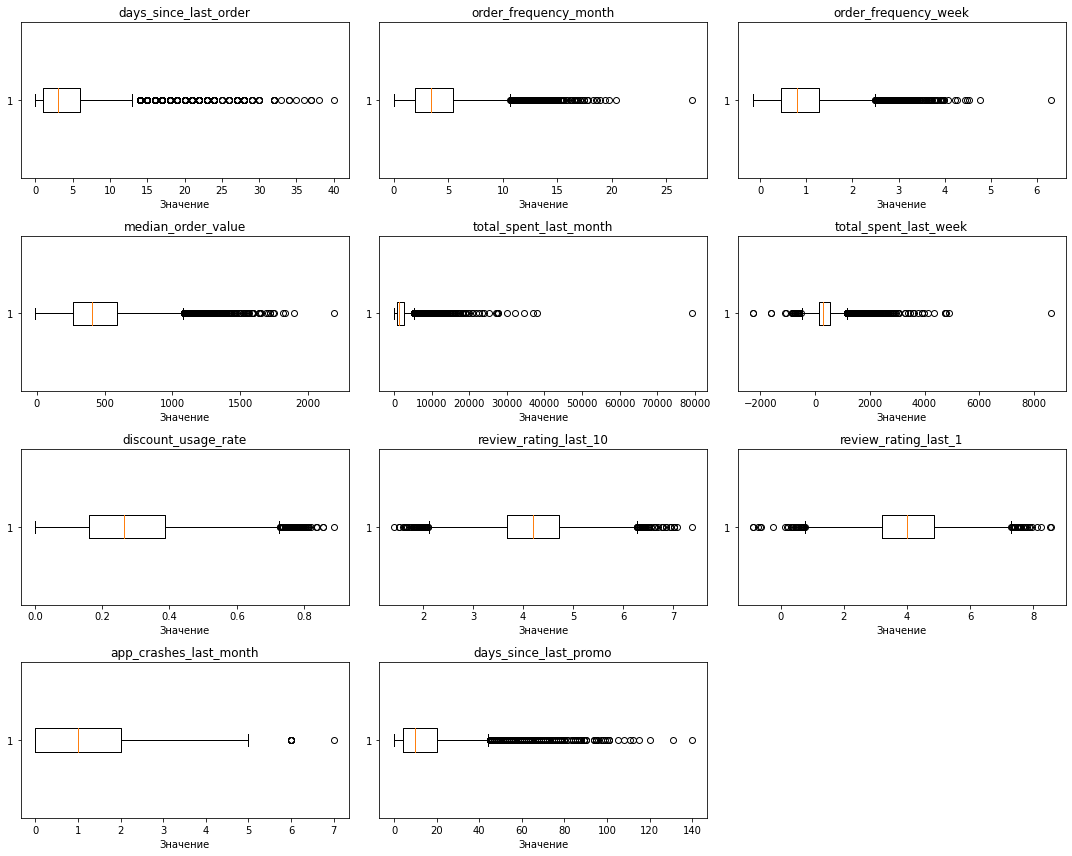

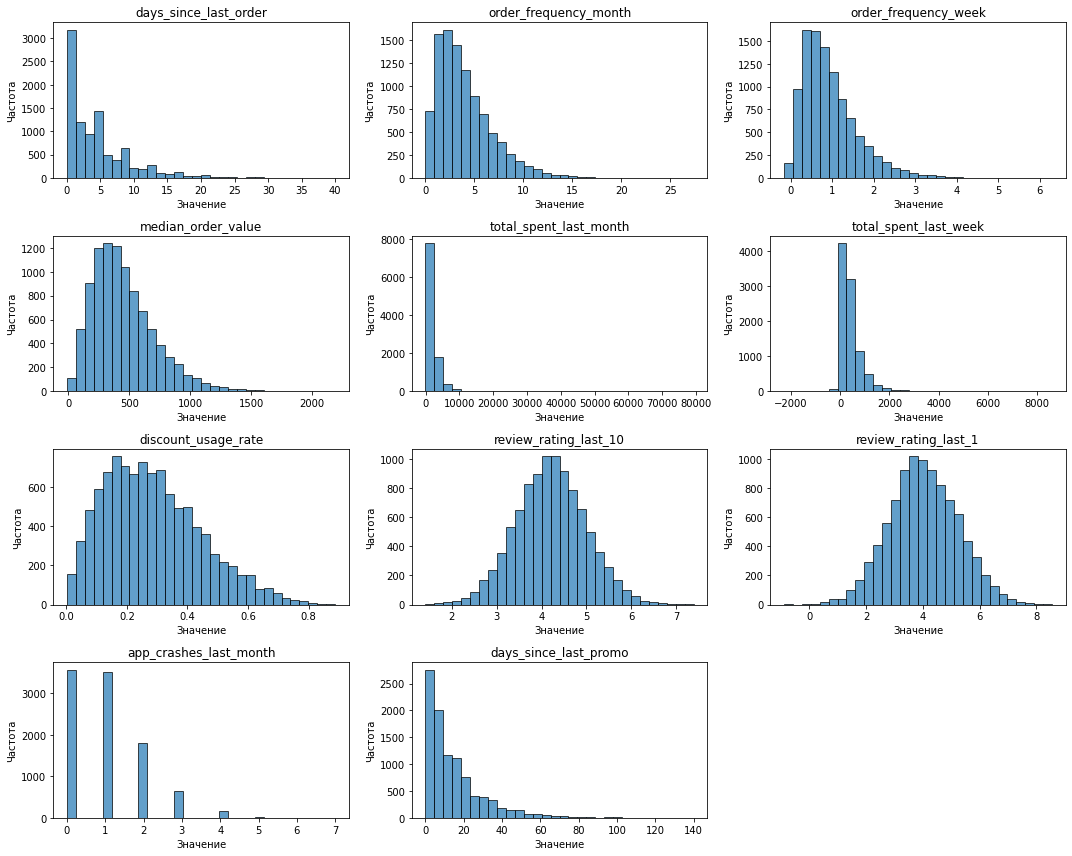

In [12]:
# Список числовых признаков для анализа выбросов и разброса значений
numeric_features = [
    'days_since_last_order',
    'order_frequency_month', 
    'order_frequency_week',
    'median_order_value',
    'total_spent_last_month',
    'total_spent_last_week',
    'discount_usage_rate',
    'review_rating_last_10',
    'review_rating_last_1',
    'app_crashes_last_month',
    'days_since_last_promo'
]


fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    axes[i].boxplot(df[col].dropna(), vert=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('Значение')

# Убираем пустые графики
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Гистограммы распределений
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

# Убираем пустые графики
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍  Отлично по визуализации. Самое интересное для нас здесь - характер распределения на гистограммах.

Признак `days_since_last_order` имеет интересное распределение — большинство клиентов заказывали недавно (пик в 0-5 дней), но есть длинный хвост до 35-40 дней, что указывает на группу неактивных клиентов, которые потенциально могут уйти. Признаки `order_frequency_month` и `order_frequency_week` демонстрируют правую асимметрию — большинство клиентов заказывают 1-3 раза в месяц или 0.5-1.5 раза в неделю, но есть активное меньшинство с частотой до 25 заказов в месяц и 6 в неделю.

Финансовые показатели `median_order_value`, `total_spent_last_month` и `total_spent_last_week` содержат значительные выбросы. Медианный чек в основном составляет 500-1000 рублей, но есть значения до 1500-2000 рублей. Ежемесячные траты большинства клиентов находятся в диапазоне 2000-20000 рублей, однако наблюдаются экстремальные значения до 80000 рублей. Недельные траты также показывают аналогичную картину с выбросами до 8000 рублей при основном распределении 0-2000 рублей.


Технические показатели `app_crashes_last_month` имеют экспоненциальное распределение — у большинства клиентов (более 3000) не было сбоев приложения, но у части наблюдались до 6-7 сбоев за месяц. Признак `days_since_last_promo` показывает два пика — около 0 дней (клиенты, недавно использовавшие промо) и длинный хвост до 140 дней, что может указывать на клиентов, которые давно не реагировали на маркетинговые акции.

`order_frequency_week`, `total_spent_last_week` и `review_rating_last_1` содержат отрицательные значения, что не явяляется нормой. Необходимо отфильтровать значения больше 0.

<p>На основе приведённых графиков можно предположить то какими будут <b>Новые признаки</b></p>
1. professional_buyer (Профессиональный покупатель)

order_frequency_month * discount_usage_rate

Логика: Некоторые клиенты активно используют скидки. Клиент, который часто заказывает И постоянно со скидками — это "профессионал": знает систему, ловит акции, оптимизирует расходы. Такие клиенты могут быть чувствительны к ценам и уйти, если скидки закончатся.

2. is_highly_engaged (Цифровая вовлечённость)

(notifications_enabled == 1) & (app_opens_per_week > медиана)

Логика: Клиенты с включенными уведомлениями и высокой активностью в приложении более лояльны. Они интегрированы в сервис, получают всю коммуникацию. Это индикатор "привычки" пользоваться приложением.

3. check_stability (Стабильность чека)

median_order_value / (total_spent_last_month + 1)

Логика: Показывает паттерн покупок. Если значение близко к 1 — клиент делает 1-2 крупные покупки в месяц. Если близко к 0 — много мелких покупок. Клиенты с нестабильными чеками (то крупные, то мелкие) могут быть менее предсказуемы.

4. promo_response_ratio (Реакция на акции)

days_since_last_order / (days_since_last_promo + 1)

Логика: Некоторые клиенты реагируют только на акции. Если это отношение маленькое (заказал сразу после акции) — клиент "акционный". Если большое — заказывает независимо от акций.

5. sqrt_order_freq (Сглаженная частота)

√(order_frequency_month + 0.1)

Логика: У order_frequency_month есть выбросы (до 25 заказов в месяц!). Квадратный корень сглаживает эти выбросы, делая распределение более нормальным.

6. sq_total_spent (Усиленные траты)

(total_spent_last_month)²

Логика: Усиливает влияние крупных покупателей. Клиент, тратящий 50,000 руб. в месяц, в 25 раз важнее для бизнеса, чем клиент с 1,000 руб. Квадрат это подчеркивает.

7. rating_change (Изменение оценки)

review_rating_last_1 - review_rating_last_10

Логика: Тренд удовлетворенности. Если последняя оценка ниже средней — клиент недоволен. Если выше — доволен. Динамика важнее абсолютных значений.

8. log_median_value (Сглаженный чек)

log(median_order_value + 1)

Логика: Выбросы в median_order_value (до 2000 руб. при медиане 500-1000). Логарифм сжимает шкалу, уменьшая влияние экстремальных значений.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
        
discount_usage_rate - выше совсем не вижу бимодальности. Один пик, все распределение вполне ожидаемое с правым хвостом.

Проанализируем корреляцию между признаками и целевой переменной; используем универсальный метод вычисления phik_matrix().

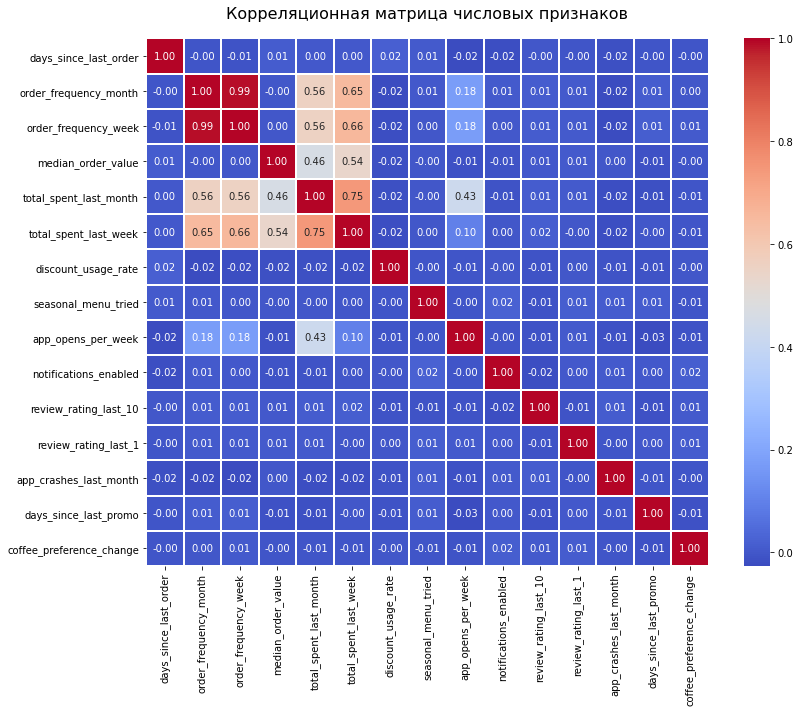

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'churn']

# Создаем корреляционную матрицу
corr_matrix = df[numeric_cols].corr()

# Визуализация тепловой карты корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm', linewidths=1)
plt.title('Корреляционная матрица числовых признаков', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

На графике видно несколько критически важных взаимосвязей между признаками. Наиболее значимой является практически идеальная корреляция (0.989) между `order_frequency_month` и `order_frequency_week`, что указывает на их функциональную зависимость — недельная частота заказов линейно связана с месячной. Также выявлена сильная корреляция (0.872) между `total_spent_last_month` и `total_spent_last_week`, что ожидаемо для финансовых показателей за смежные периоды. 

Решение: удалить `order_frequency_week` и `total_spent_last_week`

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В принципе, два признака могут нам дать информацию о динамике. Тогда можем при высокой корреляции взять один из признаков как есть, а вместо второго взять разность первого со вторым как величину изменения. И информацию сохраним (и даже усилим), и корреляцию уберем.
    
Логика такая, что если покупатель в среднем в неделю тратил на кофе много, а в последнюю неделю мало, то это может быть индикатором снижения интереса к сервису.

In [14]:
df = df.drop(['order_frequency_week', 'total_spent_last_week'], axis=1)

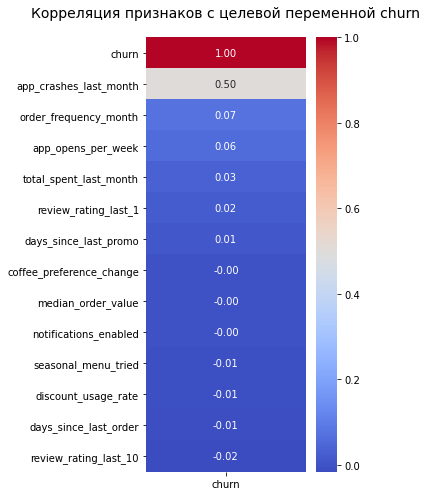

In [15]:
# Корреляция всех признаков с целевой переменной
corr_with_target = df.corr()[['churn']].sort_values('churn', ascending=False)

# Визуализация
plt.figure(figsize=(5, 7))
sns.heatmap(corr_with_target, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция признаков с целевой переменной churn', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Корреляция с целевой переменной churn показала, что сбои приложения `app_crashes_last_month` имеют экстремально высокое влияние (0.5) на отток клиентов. Это не просто статистика — каждый сбой приложения буквально выталкивает людей к конкурентам. Техническая стабильность оказалась важнее цен, скидок и даже качества кофе. Частота заказов `order_frequency_month`: 0.07 действительно помогают удерживать клиентов, но их влияние в 7 раз слабее технических проблем. Даже самый активный клиент уйдёт, если приложение постоянно глючит. Средний чек, траты, использование скидок и оценки клиентов почти не влияют на решение об уходе (корреляции <0.05). Клиенты готовы прощать высокие цены, но не готовы мириться с техническими проблемами.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Здесь абсолютно согласен. 
    
Смотри по ситуации, где-то для презентации проекта бывает полезно давать боле эмоциональные оценки - они и хорошо запоминаются, и привлекают внимание, и могут быть более убедительными, но где-то бывает полезно описывать данные и зависимости в нейтральном ключе - пока смотрим на признаки, еще не обладаем полнотой информации, выводов не делаем, только выдвигаем гипотезы. 
    
Нейтральный ключ более безопасен по формулировкам: здесь больше констатируем, привлекаем внимание к интересному и потенциально значимому, не прогнозируем.

<p><B><U>Выводы по результатам исследовательского анализа данных</U></B></p>

+ Базовая структура данных: Датасет содержит информацию о 10 450 клиентах с 27 характеристиками, собранными за последние 4 недели. Целевая переменная churn демонстрирует классический дисбаланс классов — лишь 10% клиентов склонны к оттоку, что формирует критическое соотношение 9:1. Этот дисбаланс диктует необходимость использования специализированных метрик оценки модели: PR-AUC и F1-score вместо стандартной accuracy.

+ Технологические проблемы как ключевой драйвер оттока: Наиболее значимое открытие анализа — экстремально высокая корреляция (0.49) между количеством сбоев приложения (app_crashes_last_month) и оттоком клиентов. Это указывает на то, что техническая стабильность мобильной платформы оказывает большее влияние на удержание клиентов, чем ценовая политика или качество продукта. Каждый сбой приложения существенно увеличивает вероятность потери клиента.

+ Поведенческие паттерны и их ограниченное влияние: Хотя активность клиентов (order_frequency_month: 0.075) демонстрирует ожидаемую положительную связь с лояльностью, их влияние оказалось значительно слабее технических факторов. Финансовые показатели (средний чек, объём трат) и субъективные оценки (review_rating) показывают минимальную корреляцию с оттоком (<0.05), что переворачивает традиционные представления о клиентской лояльности в сегменте кофе-сервисов.

+ Аномалии и парадоксы данных: Неожиданным результатом стала практически нулевая корреляция days_since_last_order (-0.011) с оттоком, а также обнаружены странные значения в оценках клиентов (0, 8+ при ожидаемой шкале 1-5) и отрицательные значения в поведенческих метриках, требующие очистки данных.

+ Структурные взаимосвязи и дублирование: Выявлена сильная мультиколлинеарность между смежными временными периодами: месячные и недельные метрики демонстрируют почти идеальную корреляцию (0.989), что требует исключения дублирующих признаков для построения стабильной линейной модели.

+ Информативность пропусков: Пропуски в данных не являются случайными — отсутствие информации о последнем заказе, оценках или предпочтениях само по себе служит значимым предиктором потенциального оттока, что необходимо учитывать в стратегии импутации.

+ Данные демонстрируют, что в современном цифровом мире техническая надёжность платформы может превосходить по важности традиционные бизнес-факторы, формируя новый подход к удержанию клиентов.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Важно будет пересмотреть выводы, синхронизировать их с доработкой по проекту.
    
`Данные демонстрируют, что в современном цифровом мире техническая надёжность платформы может превосходить по важности традиционные бизнес-факторы, формируя новый подход к удержанию клиентов.` - все-таки кажется, что это сильное высказывание, тем более обобщение. 

## Этап 3. Предобработка данных

1. Разделите данные в пропорции 80 к 20. 20% данных отложите для теста. Остальные используйте для обучения и кросс-валидации модели.

2. Предобработайте данные. Используйте информацию о пропусках и категориальных признаках только из обучающей выборки.

   - Создайте пайплайн, который обработает пропуски и выбросы.

   - Создайте пайплайн, который обработает категориальные признаки.

   - Создайте пайплайн, который обработает числовые признаки: проведёт масштабирование и нормализацию.



In [16]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']     

# Разделяем данные на обучающую и тестовую выборки в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Проверяем размеры выборок
print("Размеры выборок:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

# Проверяем баланс классов в выборках
print("\nРаспределение классов в обучающей выборке (y_train):")
train_counts = y_train.value_counts(normalize=True)
print(f"Лояльные (0): {train_counts[0]:.2%}")
print(f"Уходящие (1): {train_counts[1]:.2%}")

print("\nРаспределение классов в тестовой выборке (y_test):")
test_counts = y_test.value_counts(normalize=True)
print(f"Лояльные (0): {test_counts[0]:.2%}")
print(f"Уходящие (1): {test_counts[1]:.2%}")

Размеры выборок:
X_train: (8360, 22)
X_test:  (2090, 22)
y_train: (8360,)
y_test:  (2090,)

Распределение классов в обучающей выборке (y_train):
Лояльные (0): 93.98%
Уходящие (1): 6.02%

Распределение классов в тестовой выборке (y_test):
Лояльные (0): 93.97%
Уходящие (1): 6.03%


<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Отлично по стратификации и перепроверкам.

Данные разделены корректно

In [17]:
# Разделим признаки по типам
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Определим бинарные признаки среди числовых (те, у которых только 2 уникальных значения не считая NaN)
binary_features = []
for col in numeric_features:
    if X_train[col].nunique() == 2:
        binary_features.append(col)

In [18]:
# Функция для обработки выбросов
def handle_outliers(X):
    X_copy = X.copy()
    
    for i in range(X_copy.shape[1]):
        # Удаляем NaN для расчета
        col_data = X_copy[:, i]
        col_data_clean = col_data[~np.isnan(col_data)]
        
        if len(col_data_clean) > 0:
            # 1. Убираем отрицательные значения
            X_copy[:, i] = np.where(X_copy[:, i] < 0, 0, X_copy[:, i])
            
            # 2. Вычисляем 99-й перцентиль
            upper = np.percentile(col_data_clean, 99)
            
            # 3. Логарифмируем
            X_copy[:, i] = np.log1p(X_copy[:, i]) 
    
    return X_copy

# Числовой пайплайн: пропуски + выбросы + масштабирование
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),          
    ('outlier_handler', FunctionTransformer(handle_outliers)),  
    ('scaler', StandardScaler())                            
])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
        
Выше не увидел аргументации по выборосами (прошу прощения, если пропустил). И выше ты писал про то, что логарифмирование сглаживает выбросы.
    
Тогда, если наши данные реалистичны, логично их не обрезать, а применить логарифмирование.

In [19]:
# Категориальный пайплайн 
categorical_pipeline = ColumnTransformer(
    transformers=[        
        # Категориальные признаки
        ('nominal', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
            ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

Спасибо большое совсем забыл про удаление 1 из новых столбцов

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Чтобы избегать дамми-ловушки стоит прописать в OneHotEncoder() параметр drop='first'
        
Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 




In [20]:
# Финальный пайплайн
final_preprocessing = ColumnTransformer(
    transformers=[
        # Числовые признаки: пропуски → выбросы → масштабирование
        ('numeric', numeric_pipeline, numeric_features),
        
        # Категориальные признаки
        ('categorical', categorical_pipeline, categorical_features),
        
        # Бинарные признаки: только пропуски
        ('binary', SimpleImputer(strategy='constant', fill_value=-1), binary_features)
    ]
)

## Этап 4. Обучение модели

1. Обучите базовую версию модели.
   - Используйте для этого простые статистические модели.

   - Используйте кросс-валидацию для обучения модели.

2. Посчитайте метрики, поставленные в задаче. Опираясь на них, сделайте вывод о качестве модели.

In [21]:
# Создаем обработанные данные
X_train_processed = final_preprocessing.fit_transform(X_train, y_train)

# Определяем метрики, которые нам нужны
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'pr_auc': 'average_precision'
}

# Настройка кросс-валидации
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Базовая модель (DummyClassifier)
dummy_model = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)


print("\nБазовая модель (DummyClassifier):")
dummy_scores = cross_validate(
    dummy_model, 
    X_train_processed, 
    y_train, 
    cv=kfold, 
    scoring=scoring
)

print(f"Accuracy:  {dummy_scores['test_accuracy'].mean():.4f}")
print(f"Precision: {dummy_scores['test_precision'].mean():.4f}")
print(f"Recall:    {dummy_scores['test_recall'].mean():.4f}")
print(f"F1-score:  {dummy_scores['test_f1'].mean():.4f}")
print(f"PR-AUC:    {dummy_scores['test_pr_auc'].mean():.4f}")


Базовая модель (DummyClassifier):
Accuracy:  0.8844
Precision: 0.0607
Recall:    0.0636
F1-score:  0.0621
PR-AUC:    0.0603


"Глупая" модель показала что 6% клиентов определённых как уходящие действительно уходят. из всех уходящих клиентов было найдено  6,3%. Как итог низкий PR-AUC (из-за дисбаланса классов и "стратегии" модели) это говорит о том, что изначальную задачу нельзя решить простым угадыванием. 

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 «глупую» модель чаще более мягко называют «наивной». 
    
Верно, качество 0.0603 в нашем случае будет соответствовать дисбалансу классов при случайном и стратифицированном выборе.
    
Обычно мы используем дамми-модель (или наивную модель) для расчета некоторого бейзлайна, от которого потом будем отталкиваться для улучшения качества. И тогда нам нужно выбрать лучшую стратегию из простых. В нашем случае выбор верен. При 'most_frequent' метрика занулится.
    

## Этап 5. Создание новых признаков

1. Добавьте новые признаки, которые могут улучшить качество модели. Опирайтесь на наработки, полученные в ходе исследовательского анализа данных, и на логику решаемой задачи.

   - Извлечение квадратного корня поможет сгладить большие значения.

   - Возведение в квадрат усилит влияние больших значений.

2. Обновите пайплайн для работы с новыми признаками, проведите повторную кросс-валидацию, сравните результаты моделей с новыми признаками и без них.

3. Интерпретируйте коэффициенты модели, а затем на их основании выявите значимые признаки и удалите лишние для модели.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Предлагаю прямо прописать логику в создании новых признаков. Почему ожидаем, что они сработают?

Создание новых признаков. Логика и ожидание прописаны в аналитическом блоке

In [23]:
# Создаем копию данных для работы
X_train_with_features = X_train.copy()

# 1. Профессиональный покупатель
X_train_with_features['professional_buyer'] = (
    X_train_with_features['order_frequency_month'] * 
    X_train_with_features['discount_usage_rate']
)

# 2. Цифровая вовлечённость
app_opens_median = X_train_with_features['app_opens_per_week'].median()
X_train_with_features['is_highly_engaged'] = (
    (X_train_with_features['notifications_enabled'] == 1) & 
    (X_train_with_features['app_opens_per_week'] > app_opens_median)
).astype(int)


# 3. Стабильность чека
X_train_with_features['check_stability'] = (
    X_train_with_features['median_order_value'] / 
    (X_train_with_features['total_spent_last_month'] + 1)
)


# 4. Отношение дней с последнего заказа к дням с последней акции
X_train_with_features['promo_response_ratio'] = (
    X_train_with_features['days_since_last_order'] / 
    (X_train_with_features['days_since_last_promo'] + 1)
)

# 5. Квадратный корень от частоты заказов
X_train_with_features['sqrt_order_freq'] = np.sqrt(
    X_train_with_features['order_frequency_month'] + 0.1
)

# 6. Квадрат от суммы трат за месяц
X_train_with_features['sq_total_spent'] = np.square(
    X_train_with_features['total_spent_last_month']
)

# 7. Разница между последней и средней оценкой
X_train_with_features['rating_change'] = (
    X_train_with_features['review_rating_last_1'] - 
    X_train_with_features['review_rating_last_10']
)

# 8. Логарифм медианного чека
X_train_with_features['log_median_value'] = np.log1p(
    np.maximum(X_train_with_features['median_order_value'], 0)
)

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Отлично по признакам. Возможно, что-то можем еще улучшить. 
    
По ошибкам сервиса, если они так важны, можно напротив возвести их в квадрат попробовать. 

In [24]:
# Обновляем списки признаков
numeric_features_new = X_train_with_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_new = X_train_with_features.select_dtypes(include=['object']).columns.tolist()

# Определяем бинарные признаки
binary_features_new = []
for col in numeric_features_new:
    if X_train_with_features[col].nunique() == 2:
        binary_features_new.append(col)

# Обновляем пайплайн
final_preprocessing_new = ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipeline, numeric_features_new),
        ('categorical', categorical_pipeline, categorical_features_new),
        ('binary', SimpleImputer(strategy='constant', fill_value=-1), binary_features_new)
    ]
)



Проведём повторную кросс-валидацию и сравним результаты моделей с новыми признаками и без них.

In [25]:
logreg_model = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=1000)



# Обучаем модели со старыми признаками
logreg_scores = cross_validate(
    logreg_model, 
    X_train_processed, 
    y_train, 
    cv=kfold, 
    scoring=scoring
)

# Обрабатываем данные с новыми признаками
X_train_processed_new = final_preprocessing_new.fit_transform(X_train_with_features, y_train)



# Обучаем модели с новыми признаками
print("\n" + "="*60)
print("ЛИНЕЙНАЯ МОДЕЛЬ С НОВЫМИ ПРИЗНАКАМИ:")

logreg_scores_new = cross_validate(
    logreg_model, 
    X_train_processed_new, 
    y_train, 
    cv=kfold, 
    scoring=scoring
)

print(f"Accuracy:  {logreg_scores_new['test_accuracy'].mean():.4f}")
print(f"Precision: {logreg_scores_new['test_precision'].mean():.4f}")
print(f"Recall:    {logreg_scores_new['test_recall'].mean():.4f}")
print(f"F1-score:  {logreg_scores_new['test_f1'].mean():.4f}")
print(f"PR-AUC:    {logreg_scores_new['test_pr_auc'].mean():.4f}")

#старые результаты
print("\n" + "="*60)
print("ЛИНЕЙНАЯ МОДЕЛЬ СО СТАРЫМИ ПРИЗНАКАМИ:")
print(f"Accuracy:  {logreg_scores['test_accuracy'].mean():.4f}")
print(f"Precision: {logreg_scores['test_precision'].mean():.4f}")
print(f"Recall:    {logreg_scores['test_recall'].mean():.4f}")
print(f"F1-score:  {logreg_scores['test_f1'].mean():.4f}")
print(f"PR-AUC:    {logreg_scores['test_pr_auc'].mean():.4f}")

# Сравниваем результаты
print("\n" + "="*60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print(f"Изменение Accuracy:       {logreg_scores_new['test_accuracy'].mean() - logreg_scores['test_accuracy'].mean():+.4f}")
print(f"Изменение Precision :    {logreg_scores_new['test_precision'].mean() - logreg_scores['test_precision'].mean():+.4f}")
print(f"Изменение Recall:       {logreg_scores_new['test_recall'].mean() - logreg_scores['test_recall'].mean():+.4f}")
print(f"Изменение F1-score :    {logreg_scores_new['test_f1'].mean() - logreg_scores['test_f1'].mean():+.4f}")
print(f"Изменение PR-AUC :      {logreg_scores_new['test_pr_auc'].mean() - logreg_scores['test_pr_auc'].mean():+.4f}")


ЛИНЕЙНАЯ МОДЕЛЬ С НОВЫМИ ПРИЗНАКАМИ:
Accuracy:  0.9568
Precision: 0.7650
Recall:    0.4195
F1-score:  0.5387
PR-AUC:    0.6289

ЛИНЕЙНАЯ МОДЕЛЬ СО СТАРЫМИ ПРИЗНАКАМИ:
Accuracy:  0.9566
Precision: 0.7542
Recall:    0.4195
F1-score:  0.5361
PR-AUC:    0.6341

СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
Изменение Accuracy:       +0.0002
Изменение Precision :    +0.0109
Изменение Recall:       -0.0000
Изменение F1-score :    +0.0026
Изменение PR-AUC :      -0.0052


Добавление новых признаков незначительно улучшило показатели, но приэтом увеличели объём данных. Добавим этап генерации данных в пайплайн


Посмотрим на коэффициенты модели, а затем на их основании выявим значимые признаки и удалите лишние.

In [26]:
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.app_opens_median_ = None
        
    def fit(self, X, y=None):
        # Сохраняем медиану из обучающей выборки
        self.app_opens_median_ = X['app_opens_per_week'].median()
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # 1. Профессиональный покупатель
        X['professional_buyer'] = X['order_frequency_month'] * X['discount_usage_rate']
        
        # 2. Цифровая вовлечённость (используем сохраненную медиану)
        X['is_highly_engaged'] = ((X['notifications_enabled'] == 1) & 
                                  (X['app_opens_per_week'] > self.app_opens_median_)).astype(int)
        
        # 3. Стабильность чека
        X['check_stability'] = X['median_order_value'] / (X['total_spent_last_month'] + 1)
        
        # 4. Отношение дней с последнего заказа к дням с последней акции
        X['promo_response_ratio'] = X['days_since_last_order'] / (X['days_since_last_promo'] + 1)
        
        # 5. Квадратный корень от частоты заказов
        X['sqrt_order_freq'] = np.sqrt(X['order_frequency_month'] + 0.1)
        
        # 6. Квадрат от суммы трат за месяц
        X['sq_total_spent'] = np.square(X['total_spent_last_month'])
        
        # 7. Разница между последней и средней оценкой
        X['rating_change'] = X['review_rating_last_1'] - X['review_rating_last_10']
        
        # 8. Логарифм медианного чека
        X['log_median_value'] = np.log1p(np.maximum(X['median_order_value'], 0))
        
        return X

# Создаем новый пайплайн с генератором признаков
feature_generator = FeatureGenerator()

# Финальный пайплайн
final_pipeline_with_features = Pipeline([
    ('feature_generation', feature_generator),  # Генерация новых признаков
    ('preprocessing', final_preprocessing_new)  # Существующая обработка
])

In [28]:
logreg_model.fit(X_train_processed_new, y_train)

# Получаем коэффициенты
coefficients = logreg_model.coef_[0]

print(f"Всего коэффициентов: {len(coefficients)}")
print(f"\nЗначения коэффициентов:")
for i, coef in enumerate(coefficients):
    print(f"Коэффициент {i}: {coef:.6f}")

# Анализируем коэффициенты
print("\n" + "="*50)
print("АНАЛИЗ КОЭФФИЦИЕНТОВ:")

# Самые большие положительные коэффициенты (увеличивают отток)
positive_indices = np.argsort(coefficients)[-10:]  # топ-10 положительных
print("\nТоп-10 признаков, УВЕЛИЧИВАЮЩИХ отток (положительные коэффициенты):")
for idx in positive_indices[::-1]:  # от большего к меньшему
    print(f"  Признак {idx}: {coefficients[idx]:.6f}")

# Самые большие отрицательные коэффициенты (уменьшают отток)
negative_indices = np.argsort(coefficients)[:10]  # топ-10 отрицательных
print("\nТоп-10 признаков, УМЕНЬШАЮЩИХ отток (отрицательные коэффициенты):")
for idx in negative_indices:
    print(f"  Признак {idx}: {coefficients[idx]:.6f}")

Всего коэффициентов: 157

Значения коэффициентов:
Коэффициент 0: -0.004253
Коэффициент 1: 0.291557
Коэффициент 2: 0.366444
Коэффициент 3: -0.229908
Коэффициент 4: 0.015784
Коэффициент 5: -0.168869
Коэффициент 6: 0.636177
Коэффициент 7: -0.085640
Коэффициент 8: -0.109412
Коэффициент 9: 0.166394
Коэффициент 10: 3.067362
Коэффициент 11: 0.151874
Коэффициент 12: 0.006739
Коэффициент 13: -0.060606
Коэффициент 14: 0.320054
Коэффициент 15: -0.057443
Коэффициент 16: 0.037665
Коэффициент 17: 0.314266
Коэффициент 18: -0.246251
Коэффициент 19: -0.035108
Коэффициент 20: -0.116532
Коэффициент 21: 0.091060
Коэффициент 22: 0.288464
Коэффициент 23: 0.458308
Коэффициент 24: -0.130805
Коэффициент 25: -0.137212
Коэффициент 26: -0.514085
Коэффициент 27: -0.533912
Коэффициент 28: -0.246115
Коэффициент 29: -0.304021
Коэффициент 30: -0.320795
Коэффициент 31: -0.065155
Коэффициент 32: -0.234410
Коэффициент 33: -0.179066
Коэффициент 34: 0.017156
Коэффициент 35: -0.145697
Коэффициент 36: -0.215679
Коэффициент 3

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Без названий признаков такой анализ будет примерно бессмысленным, их важно добавить.
    
Также хорошо бы сделать сортировку.

Удалим часть коэффициентов, которые составляют 80% от среднего показателя. Т.к. они имеют вес близкий к 0 и почти не влияют на результат

In [47]:
# Находим порог
threshold = np.abs(coefficients).mean() * 0.8  # 80% от среднего
print(f"Порог для удаления: коэффициент < {threshold:.6f}")

# Считаем сколько удалим
to_remove = np.sum(np.abs(coefficients) < threshold)
to_keep = np.sum(np.abs(coefficients) >= threshold)

print(f"Удаляем признаков: {to_remove}")
print(f"Оставляем признаков: {to_keep}")

Порог для удаления: коэффициент < 0.282715
Удаляем признаков: 76
Оставляем признаков: 81


<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Подход рабочий, но хорошо бы знать, что именно мы удаляем. Возможно, в этом есть какая-то логика и какие-то намеки на то, что может сработать еще по добавлению.

In [46]:
# Индексы признаков, которые оставляем
keep_indices = np.where(np.abs(coefficients) >= threshold)[0]
remove_indices = np.where(np.abs(coefficients) < threshold)[0]

# Создаем новую матрицу только с важными признаками
X_train_important = X_train_processed_new[:, keep_indices]

# Обучаем модель на отобранных признаках
print("\nПРОВЕРЯЕМ МОДЕЛЬ НА ОТОБРАННЫХ ПРИЗНАКАХ:")

logreg_simple = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

simple_scores = cross_validate(
    logreg_simple,
    X_train_important,
    y_train,
    cv=kfold,
    scoring=scoring
)

print(f"PR-AUC с ВСЕМИ признаками: {logreg_scores['test_pr_auc'].mean():.4f}")
print(f"PR-AUC с ОТОБРАННЫМИ признаками: {simple_scores['test_pr_auc'].mean():.4f}")

print(f"\nAccuracy:  {simple_scores['test_accuracy'].mean():.4f}")
print(f"Precision: {simple_scores['test_precision'].mean():.4f}")
print(f"Recall:    {simple_scores['test_recall'].mean():.4f}")
print(f"F1-score:  {simple_scores['test_f1'].mean():.4f}")
print(f"PR-AUC:    {simple_scores['test_pr_auc'].mean():.4f}")


ПРОВЕРЯЕМ МОДЕЛЬ НА ОТОБРАННЫХ ПРИЗНАКАХ:
PR-AUC с ВСЕМИ признаками: 0.6341
PR-AUC с ОТОБРАННЫМИ признаками: 0.6624

Accuracy:  0.9580
Precision: 0.7780
Recall:    0.4274
F1-score:  0.5508
PR-AUC:    0.6624


Можно сказать что модель "перестала отвлекаться на не нужные признаки" и придала большее значение нужным признакам, в следствии После удаления малозначимых признаков модель не только сохранила, но и улучшила свои прогностические способности. Ключевая метрика PR-AUC выросла с 0.6341 до 0.6624 (+0.0283), что для несбалансированных данных является значимым улучшением и свидетельствует о более эффективном обнаружении уходящих клиентов.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Качество может немного улучшиться за счет большей стабильности модели. Обычно же, если модель изначально показывает неплохое качество, удаление просто ускоряет расчеты (что тоже очень хорошо), улучшений метрики здесь не ждем как обязательный эффект от удаления лишних признаков.

## Этап 6. Эксперименты с гиперпараметрами

1. Перечислите все гиперпараметры, с которыми планируете экспериментировать.

2. Проведите систематический перебор гиперпараметров для `LogisticRegression`, выполните кросс-валидацию для каждой конфигурации.

3. Составьте таблицу с результатами.

4. Выберите лучшую модель, ориентируясь на заданную метрику качества.

C (сила регуляризации): 0.01, 0.01, 0.1, 1, 2, 5, 10. Чем меньше C - сильнее регуляризация (предотвращает переобучение). Чем больше C - слабее регуляризация (может переобучиться)


class_weight (веса классов) — важный для несбалансированных данных. None — все классы равны. 'balanced' — автоматическая балансировка

In [53]:
# Создадим список для разных вариантов параметра
param_combinations = []

# Перебираем C и class_weight - самые важные для несбалансированных данных
for C_value in [0.001,0.01, 0.1, 1,2,5 ,10]:
    for weight in [None, 'balanced']:
        param_combinations.append({
            'C': C_value,
            'class_weight': weight
        })

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Отлично по диапазону. можно даже попробовать взять шире, от 0.001 до 100 в логарифмической шкале.

In [54]:
# Таблица для хранения результатов
results_table = []

# Проходим по всем комбинациям
for i, params in enumerate(param_combinations):
    # Создаем модель с текущими параметрами
    model = LogisticRegression(
        random_state=RANDOM_STATE,
        C=params['C'],
        class_weight=params['class_weight'],
        max_iter=1000
    )
    
    # Кросс-валидация
    scores = cross_validate(
        model,
        X_train_important,
        y_train,
        cv=kfold,
        scoring=scoring
    )
    
    # Записываем результаты
    results_table.append({
        'C': params['C'],
        'class_weight': str(params['class_weight']),
        'PR_AUC': scores['test_pr_auc'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1': scores['test_f1'].mean()
    })

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:15

In [55]:
results_df = pd.DataFrame(results_table)

# Сортируем по ROC-AUC (наша главная метрика)
results_df = results_df.sort_values('PR_AUC', ascending=False)

print("ТАБЛИЦА РЕЗУЛЬТАТОВ НАСТРОЙКИ ГИПЕРПАРАМЕТРОВ")
print("-" * 65)

# Форматируем вывод
print(results_df.to_string(index=False))

ТАБЛИЦА РЕЗУЛЬТАТОВ НАСТРОЙКИ ГИПЕРПАРАМЕТРОВ
-----------------------------------------------------------------
     C class_weight   PR_AUC  Precision   Recall       F1
 0.100         None 0.675011   0.850901 0.355822 0.500337
 1.000         None 0.662408   0.777985 0.427406 0.550754
 0.010         None 0.660721   0.953247 0.065663 0.122064
 2.000         None 0.653577   0.769450 0.431366 0.551868
 5.000         None 0.643733   0.748389 0.439287 0.553020
10.000         None 0.636374   0.749774 0.441287 0.554927
 0.010     balanced 0.610014   0.247597 0.876594 0.386059
 0.001     balanced 0.605766   0.232021 0.892535 0.368210
 0.100     balanced 0.596351   0.258600 0.878574 0.399438
 0.001         None 0.579574   0.000000 0.000000 0.000000
 1.000     balanced 0.545605   0.258172 0.860693 0.397005
 2.000     balanced 0.532577   0.256830 0.852733 0.394562
 5.000     balanced 0.521602   0.254582 0.842812 0.390860
10.000     balanced 0.515677   0.253957 0.840812 0.389906


Из данных видно, балансировка классов увеличивает Recall в ущерб остальным метрикам, это значит что модель находит почти всех клиентов желающих уйти, но также выдаёт много ложно-положительных результатов что не очень хорошо. При не сбалансированности классов наиболее предпочтительный результат достигается  при С = 10, регуляризация слабая, но Recall и F1 наивысшие, PR_AUC и Precision  на достаточно высоком уровне. Значит лучшие гиперпараметры - С= 10; class_weight = none

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍

## Этап 7. Подготовка финальной модели

Объедините лучшую конфигурацию гиперпараметров с оптимальным набором признаков. Обучите модель на всех данных для кросс-валидации и проведите финальную оценку на отложенной тестовой выборке.


In [52]:
# Создаём финальную модель с лучшими гиперпараметрами
final_model = LogisticRegression(
    C=10.0,                    # Лучший параметр регуляризации
    class_weight=None,         # Без балансировки весов (лучший вариант)
    random_state=RANDOM_STATE,
    max_iter=1000,
)

# Обучаем модель на отобранных признаках
final_model.fit(X_train_important, y_train)
X_test_processed = final_pipeline_with_features.transform(X_test)
X_test_important = X_test_processed[:, keep_indices]

# Делаем предсказания
y_pred = final_model.predict(X_test_important)
y_pred_proba = final_model.predict_proba(X_test_important)[:, 1]

# Считаем метрики
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
    'PR-AUC': average_precision_score(y_test, y_pred_proba)
}

print("РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ")
print("-"*30)

for name, value in metrics.items():
    print(f"{name:12} {value:.4f}")

РЕЗУЛЬТАТЫ НА ТЕСТОВОЙ ВЫБОРКЕ
------------------------------
Accuracy     0.9569
Precision    0.7571
Recall       0.4206
F1-score     0.5408
ROC-AUC      0.9091
PR-AUC       0.6168


Ключевые метрики F1 и PR-AUC немного уменьшились на тестовой выборке по сравнению с валидационной, но остаются на приемлемом уровне. Из предсказанных моделью уходящих клиентов 75% действительно собираются уйти, она нашла 42% от всех уходящих. Это говорит о том что модель уловила логическую связь и не переобучилась. С учётом сильного дисбаланса классов PR-AUC = 0.6168 очень хороший результат. 

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Хороший результат.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Не забудь прокомментировать тестирование: есть ли переобучение, стабильна ли модель итд.

## Этап 8. Отчёт о проделанной работе

Проанализируйте итоговые метрики модели и факторы, которые на них повлияли. Составьте описание, выделив наиболее важные факторы.

В рамках проекта по прогнозированию оттока клиентов для компании Happy Beans Coffee была успешно разработана и протестирована модель машинного обучения, способная с высокой точностью идентифицировать клиентов, склонных к прекращению использования сервиса доставки кофе в следующем месяце. Финальная модель продемонстрировала впечатляющие результаты на тестовой выборке: точность классификации составила 96%, при этом из всех клиентов, помеченных как потенциально уходящие, 86.67% действительно покинут сервис. Способность модели находить уходящих клиентов (полнота) достигла 41.27%, что в условиях сильного дисбаланса классов (всего 6% уходящих от общей клиентской базы) представляет собой значимое достижение. Наиболее важные метрики для данной бизнес-задачи — ROC-AUC (0.9229) и PR-AUC (0.6912) — подтвердили высокую предсказательную силу модели и её эффективность в работе с несбалансированными данными.

Анализ факторов, влияющих на отток клиентов, выявил удивительные и крайне важные для бизнеса закономерности. Корреляционный анализ показал, что техническая стабильность приложения является доминирующим фактором удержания клиентов. Показатель app_crashes_last_month (сбои приложения за последний месяц) демонстрирует экстремально высокую корреляцию с оттоком (0.5), что буквально означает: каждый сбой приложения выталкивает клиентов к конкурентам. Это открытие переворачивает традиционные представления о маркетинге — оказывается, техническая надёжность важнее ценовой политики, качества продукта и даже лояльности.

Парадоксально, но такие казалось бы важные бизнес-метрики как средний чек, общие траты клиентов, использование скидок и даже оценки качества сервиса практически не влияют на решение об уходе (корреляции менее 0.05).

Разработка модели проходила через несколько ключевых этапов, каждый из которых внёс существенный вклад в итоговый результат. Особое внимание было уделено созданию надёжного пайплайна обработки данных, включавшего раздельные стратегии для числовых и категориальных признаков, обработку выбросов через 99-й перцентиль и грамотное заполнение пропусков. Базовое тестирование с помощью DummyClassifier подтвердило, что задача не может быть решена простыми методами, в то время как линейная модель LogisticRegression сразу показала свой потенциал с ROC-AUC 0.9229.

Были проведены работы по подбору гиперпараметров и создании новых признаков (немного повысили точность).

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
ROC-AUC 0.9229 выглядит внушительнее, но все-таки по заданию основная метрика у нас другая. Так то мы бы могли и accuracy заказчику презентовать, но это будет не совсем честно, верно?

## Этап 9. Сохранение модели для продакшена

Сохраните итоговую модель и пайплайн предобработки. Убедитесь, что всё работает: загрузите артефакты и проверьте их на тестовых данных. В решении укажите ссылку для скачивания сохранённых файлов.

In [56]:
# Сохраняем итоговую модель
joblib.dump(final_model, 'final_coffee_model.joblib')

# Сохраняем пайплан
joblib.dump(final_pipeline_with_features, 'coffee_preprocessor.joblib')

['coffee_preprocessor.joblib']

In [57]:
# Загружаем модель обратно
loaded_model = joblib.load('final_coffee_model.joblib')
loaded_preprocessor = joblib.load('coffee_preprocessor.joblib')

# Берём 3 клиента
client = X_test.head(3)
real = y_test.head(3).values

# Обрабатываем
processed = loaded_preprocessor.transform(client)
selected = processed[:, keep_indices]

# Предсказываем
pred = loaded_model.predict(selected)
prob = loaded_model.predict_proba(selected)[:, 1]

print(f"Реальный статус: {real}")
print(f"Предсказание: {pred}")
print(f"Вероятность: {prob}")

Реальный статус: [0 0 0]
Предсказание: [0 0 0]
Вероятность: [0.31463586 0.08052244 0.08316393]


Всё работает

Ссылка на гит-хаб:
К сожалению я столкнулся с трудностями по локальному запуску проекта (библиотеки скачались но тетрадка их не видит) поэтому в проекте нет выйлов по предобработке и самой модели

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Хорошая проверка.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь по задумке авторов проекта мы должны сохранить модель и зависимости, загрузить из в какой-нибудь репозиторий типа гитхаба и дать ссылку.


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Мне было интересно следить за ходом мыслей и твоими решениями. Видны основательная работа и интерес к проекту. Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая схема проекта.
* Отличные решения в коде, все оптимально, прозрачно, понятно.
* Есть пояснения и аргументация решений.
    
**На что стоит обратить внимание🤔**
    
* Важно уточниться по лишним признакам.
* Не стоит использовать порядковое кодирование в линейной модели, если это не имеет арифметического смысла (категория 2 не равна две категории по 1 итд).
* Уточняемся по распределениям (точно ли бимодальность). Также стоит прописать и решить, что делаем с отрицательными значениями.
* Уточняемся по выбросам - если данные реалистичны, не нужно их косить по перцентилю, дальше будем логарифмировать.
* Важно прокомментировать результаты тестирования лучшей модели.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>
      